In [44]:
!pip install matplotlib

  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/46/37/b5e27ab30ecc0a3694c8a78287b5ef35dad0c3095c144fcc43081170bfd6/matplotlib-3.8.2-cp310-cp310-win_amd64.whl.metadata
  Obtaining dependency information for contourpy>=1.0.1 from https://files.pythonhosted.org/packages/fd/7c/168f8343f33d861305e18c56901ef1bb675d3c7f977f435ec72751a71a54/contourpy-1.2.0-cp310-cp310-win_amd64.whl.metadata
  Obtaining dependency information for cycler>=0.10 from https://files.pythonhosted.org/packages/e7/05/c19819d5e3d95294a6f5947fb9b9629efb316b96de511b418c53d245aae6/cycler-0.12.1-py3-none-any.whl.metadata
  Obtaining dependency information for fonttools>=4.22.0 from https://files.pythonhosted.org/packages/3c/35/f37c8bda77eee9d4d3a7306ad1d2d71d1e8739fd4f574fac07bd63ddc293/fonttools-4.46.0-cp310-cp310-win_amd64.whl.metadata
     ---------------------------------------- 0.0/159.4 kB ? eta -:--:--
     -------------------------------------- 159.4/159.4 kB 4.8 MB/s e


[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [50]:
import pandas as pd
import matplotlib.pyplot as plt

In [69]:
pred_rev = pd.read_csv("bin_4_RandomForestRegressor(max_depth=50)_pred.csv", index_col=0, usecols=[0,74])
baseline = pd.read_csv("bin_4_rf_10_BASELINE_predictions_corrected.csv", index_col=0, usecols=[0,5,29,31,74])
baseline.rename(columns={"Predictions": "baseline_preds"}, inplace=True)
merged = baseline.merge(pred_rev, right_index=True,left_index=True)

[22591.10802352322, 29034.747592501095, 33725.71092058887, 30596.244670402495, 34099.79452684595, 33954.437391550746, 34246.71637282847, 27841.368081873257, 28511.261374727615, 28067.031517621454]


30266.84204724632

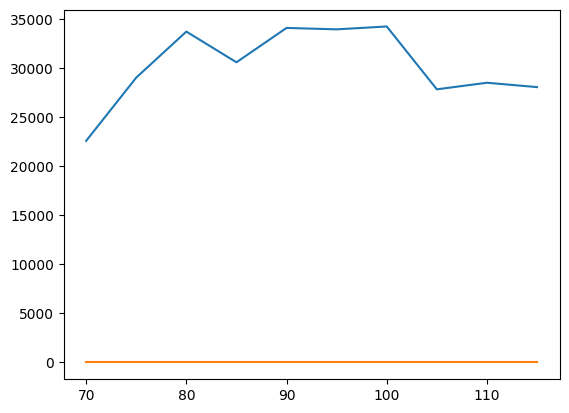

In [75]:
year = 2022
sorted_bl = merged.sort_values(by=['baseline_preds'], ascending=False)
sorted_2023_bl = sorted_bl[sorted_bl['Release Year'] == year]

sorted = merged.sort_values(by=['Predictions'], ascending=False)
sorted_2023 = sorted[sorted['Release Year']==year]

profit = 10*[0]
share = 7/39007

for i in range(10):
    pred_rev = sum(sorted_2023[:i*5+70]['Merged Revenue'])
    bl_rev = sum(sorted_2023_bl[:i*5+70]['Merged Revenue'])
    profit[i] = (pred_rev-bl_rev)*share*1.03333

print(profit)
num_movies = [i*5+70 for i in range(10)]

plt.plot(num_movies,profit)
plt.plot(num_movies,10*[0])
sum(profit)/10

In [36]:
sorted_2023[:25]

,IMDB Title,Merged Revenue,Release Year,baseline_preds,Predictions
201,Indiana Jones and the Dial of Destiny (2023),174480468,2023,1.194235e+08,1.981318e+08
269,Guardians of the Galaxy Vol. 3 (2023),358995815,2023,1.455479e+08,1.356786e+08
258,Mission: Impossible - Dead Reckoning Part One ...,172135383,2023,1.099506e+08,1.303092e+08
289,Fast X (2023),145960660,2023,1.185163e+08,1.222736e+08
182,The Flash (2023),108133313,2023,1.724644e+08,1.184028e+08
297,Elemental (2023),154426697,2023,4.619745e+07,8.948530e+07
255,Ant-Man and the Wasp: Quantumania (2023),214504909,2023,4.619745e+07,8.739678e+07
267,The Little Mermaid (2023),298172056,2023,1.455479e+08,8.511307e+07
266,Oppenheimer (2023),322724910,2023,3.268978e+07,8.150744e+07
221,The Super Mario Bros. Movie (2023),574934330,2023,3.268978e+07,6.333786e+07
